Data Scientist Workshop - ex.3.3 - Adam Trentowski, 162602

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [11]:
dataset = pd.read_csv('D:/Projekty/DataScientistWorkshop/lab_03/files/ToxinsbaseClass.csv')

dataset.shape

(137, 23)

In [12]:
dataset.head()

,Latitude,Longitude,MaximumDepth,SecchiDepth,Sampling Depth,T_Surf,T_Epi,Zeu / Zmix,BuoyFreq,TP,...,MC_dmRR,MC_RR,MC_dmLR,MC_LR,CYN,ATX,ToxinRichness,TDI,TTC,Toxicity
0,46.673750,6.322253,18.0,1.05,10.5,22.5,21.1,0.21,0.01,0.02,...,0.000,0.0,0.001,0.000,0.0,0.0,2,0.42,0.001,1
1,46.514161,6.773583,13.0,1.60,9.0,20.4,19.3,0.50,0.01,0.09,...,0.000,0.0,0.003,0.004,0.0,0.0,3,1.05,0.009,1
2,46.354617,6.152489,3.5,3.50,3.0,26.0,25.9,2.00,0.00,0.12,...,0.000,0.0,0.002,0.019,0.0,0.0,3,0.39,0.021,1
3,47.287447,8.211500,48.0,1.75,12.0,23.9,19.4,0.52,0.01,0.02,...,0.302,0.0,0.290,0.005,0.0,0.0,4,1.00,0.668,2
4,46.638953,6.286464,32.0,4.00,11.0,21.5,19.7,0.91,0.01,0.07,...,0.090,0.0,0.056,0.003,0.0,0.0,4,1.07,0.177,2


In [13]:
dataset.describe()

,Latitude,Longitude,MaximumDepth,SecchiDepth,Sampling Depth,T_Surf,T_Epi,Zeu / Zmix,BuoyFreq,TP,...,MC_dmRR,MC_RR,MC_dmLR,MC_LR,CYN,ATX,ToxinRichness,TDI,TTC,Toxicity
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,51.104677,14.813468,17.987591,1.486715,6.429927,22.183212,20.775912,0.987226,0.005693,0.088102,...,0.558226,0.205036,0.156095,0.199876,0.048482,0.028036,3.941606,0.780657,1.350766,1.832117
std,6.051893,10.720521,27.797015,1.258167,4.819238,3.102930,3.143774,1.117894,0.006159,0.109649,...,1.903642,0.507328,0.513956,0.574369,0.209486,0.124335,1.625922,0.394969,2.849080,0.800453
min,36.755550,-25.788917,1.000000,0.160000,0.700000,9.000000,8.700000,0.040000,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,47.350792,10.983188,4.500000,0.650000,3.000000,20.300000,18.900000,0.350000,0.000000,0.030000,...,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,3.000000,0.530000,0.033000,1.000000
50%,52.413611,16.698806,9.000000,1.050000,5.000000,22.000000,20.400000,0.550000,0.010000,0.060000,...,0.000000,0.000000,0.007000,0.017000,0.000000,0.000000,4.000000,0.880000,0.189000,2.000000
75%,54.591528,21.592222,23.000000,1.800000,9.000000,23.900000,22.300000,1.230000,0.010000,0.090000,...,0.086000,0.119000,0.047000,0.098000,0.004000,0.004000,5.000000,1.060000,0.901000,2.000000
max,62.239189,32.832500,251.000000,6.200000,30.000000,31.400000,31.200000,8.800000,0.030000,0.870000,...,14.892000,3.309000,3.166000,3.968000,2.007000,1.333000,7.000000,1.440000,17.189000,3.000000


In [14]:
X = dataset.iloc[: , 0:21].values
y = dataset.iloc[: , 22].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature scaling

In [16]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)  # should be .transform()?

In [17]:
pca = PCA(n_components=2)

Fitting the feature metric data into PCA model  

In [18]:
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)  # should be .transform()?

In [19]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.26828268, 0.14918599])

In [20]:
classifier = LogisticRegression(random_state=0)

In [21]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [22]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 2,
       3, 2, 2, 3, 1, 2], dtype=int64)

Making a confusion matrix

In [23]:
confusion_matric = confusion_matrix(y_test, y_pred)
confusion_matric

array([[9, 3, 0],
       [3, 2, 5],
       [1, 0, 5]], dtype=int64)

Accuracy score

In [24]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5714285714285714

Making the prediction of train set result

In [25]:
y_pred = classifier.predict(X_train)
y_pred

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 1, 2, 2, 1, 3,
       2, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 3, 3, 1, 1, 1, 3, 1, 2,
       1, 1, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 3, 2, 2,
       2, 3, 3, 2, 2, 2, 1, 2, 1, 1, 1, 2, 3, 3, 3, 1, 1, 1, 3, 3, 2, 2,
       2, 2, 1, 2, 1, 3, 2, 2, 3, 1, 2, 2, 2, 2, 1, 3, 1, 2, 3, 1, 1],
      dtype=int64)

Making a confusion matrix

In [26]:
confusion_matric = confusion_matrix(y_train, y_pred)
confusion_matric

array([[38,  7,  0],
       [10, 22,  4],
       [ 1,  8, 19]], dtype=int64)

Accuracy score

In [27]:
accuracy = accuracy_score(y_train, y_pred)
accuracy

0.7247706422018348

Visualising the Test set results

C:\Users\Adam\AppData\Local\Temp\ipykernel_19592\554379438.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue'))(i), label = j)


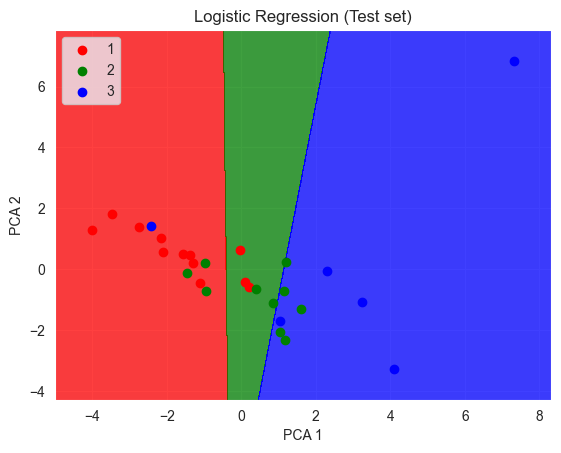

In [28]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start=X_set[: , 0].min() - 1, stop=X_set[: , 0].max() + 1, step=0.01),
                     np.arange(start=X_set[: , 1].min() - 1, stop=X_set[: , 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()

plt.show()

C:\Users\Adam\AppData\Local\Temp\ipykernel_19592\1053081278.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue'))(i), label = j)


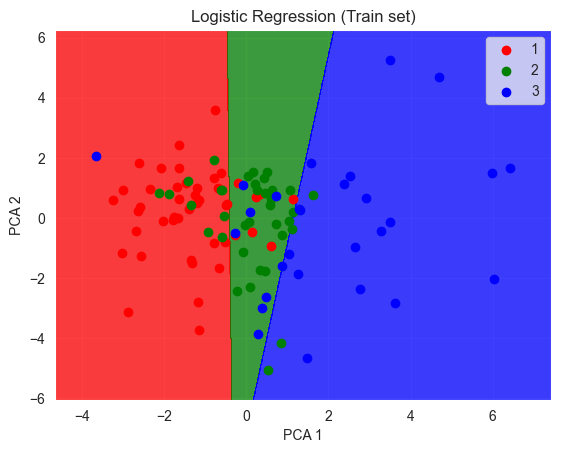

In [29]:
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start=X_set[: , 0].min() - 1, stop=X_set[: , 0].max() + 1, step=0.01),
                     np.arange(start=X_set[: , 1].min() - 1, stop=X_set[: , 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Train set)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()

plt.show()